In [ ]:
# !pip install catboost

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, chi2
import random
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# import shap
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import copy
import xgboost as xgb
import lightgbm as lgb
# from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.feature_selection import RFECV
from torch.optim import AdamW
from torch.optim import SGD
import torch.nn.init as init
from torch.optim.lr_scheduler import CyclicLR
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import confusion_matrix
from sklearn.calibration import calibration_curve

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

# translate

In [ ]:
# data = pd.read_csv('/content/drive/My Drive/df_data_nw.csv', sep=";")

In [ ]:
# data.columns

In [ ]:
# data

In [ ]:
# data[data['ГБ новая'] == "да"]

In [ ]:
translated_columns = ['date', 'time', 'Thirst', 'caffeine', 'startAnswering', 'Yawning',
       'anxiety', 'HA new', 'alcohol', 'depression', 'neck pain',
       'Sleepiness', 'vegetative', 'subnausea', 'feeling hungry',
       "urination", "eye strain", "enough water?",
       'cheese, choco, citrus', 'Expecting a migraine', 'Workaholism',
       'Wanted chocolate', 'Feeling tired', 'Irritability',
       "Any pungent odors?", "Skipping meals", "Scalp sensitivity",
       'Physical activity', 'More sound than usual',
       'Difficulty concentrating', 'More light than usual',
       'Sensitivity to sound', 'Sensitivity to light',
       'Sensitivity to odors', 'id', 'flights', 'what day',
       'day 1 of menstruation', '% diary completion', 'aura', 'nausea',
       'YOUR max', 'Name', 'throbbing', 'Pain now', 'Pain onset',
       'Quality of sleep', 'unilateral', 'Analgesic', 'Freshness after sleep',
       'noticed provocateur', 'amplification by movement', 'sleep duration',
       'sensitivity to sound', 'sensitivity to light',
       'sensitivity to odors', 'HA continuation', 'End of pain',
       'comment', 'what trigger']

In [ ]:
# data.columns = translated_columns
# data.dropna(subset=["HA new"], inplace=True)

In [ ]:
# data = data.drop(data.iloc[:, 27:58],axis = 1)

# NEW

In [44]:
data = pd.read_csv('df_data_nw.csv', sep=";")

<ipython-input-44-34472f30195b>:1: DtypeWarning: Columns (11,14,20,23,33,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('df_data_nw.csv', sep=";")


In [45]:
df1 = data[data["ГБ новая"]=="да"]

In [46]:
df2 = data[data["ГБ новая"]=="нет"].iloc[:df1.shape[0]]

In [47]:
df2

,date,time,Жажда,кофеин,startAnswering,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,...,заметил провокатор,усиление движением,Продолжительность сна,чувствительность к звуку,чувствительность к свету,чувствительность к запахам,ГБ продолжение,Окончание боли,комментарий,какой триггер
0,2023-01-25,15:00,да,да,1674640902,нет,1,нет,нет,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-25,21:00,нет,нет,1674662469,нет,1,нет,нет,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-26,21:00,нет,нет,1674749597,нет,1,нет,нет,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-01-27,10:00,да,нет,1674795739,нет,1,нет,нет,1,...,NaN,NaN,8:30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023-01-27,15:00,нет,нет,1674816095,нет,1,нет,слишком много,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2023-04-08,15:00,нет,нет,1680955920,нет,нет,нет,да,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5727,2023-04-08,21:00,нет,нет,1680981799,нет,1,нет,да,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5728,2023-04-09,10:00,нет,да,1681026820,нет,1,нет,нет,1,...,NaN,NaN,08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5729,2023-04-09,15:00,нет,нет,1681059646,нет,1,нет,да,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
data = pd.concat([df1, df2])

In [49]:
data

,date,time,Жажда,кофеин,startAnswering,Зевания,Тревога,ГБ новая,Алкоголь,Депрессия,...,заметил провокатор,усиление движением,Продолжительность сна,чувствительность к звуку,чувствительность к свету,чувствительность к запахам,ГБ продолжение,Окончание боли,комментарий,какой триггер
2,2023-01-26,10:00,да,нет,1674710845,нет,1,да,нет,2,...,нет,да,06:30,да,нет,нет,NaN,NaN,NaN,NaN
11,2023-01-29,10:00,да,нет,1674968441,нет,3,да,нет,4,...,нет,да,06:30,нет,нет,нет,NaN,NaN,NaN,NaN
34,2023-02-06,10:00,да,нет,1675659700,нет,1,да,нет,2,...,нет,да,09:00,нет,да,нет,NaN,NaN,NaN,NaN
37,2023-02-07,10:00,да,нет,1675747036,нет,1,да,да,3,...,нет,да,08:00,нет,да,нет,NaN,NaN,NaN,NaN
60,2023-02-16,15:00,нет,нет,1676541763,нет,1,да,нет,1,...,нет,да,NaN,нет,нет,нет,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,2023-04-08,15:00,нет,нет,1680955920,нет,нет,нет,да,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5727,2023-04-08,21:00,нет,нет,1680981799,нет,1,нет,да,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5728,2023-04-09,10:00,нет,да,1681026820,нет,1,нет,нет,1,...,NaN,NaN,08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5729,2023-04-09,15:00,нет,нет,1681059646,нет,1,нет,да,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [50]:
translated_columns = ['date', 'time', 'Thirst', 'caffeine', 'startAnswering', 'Yawning',
       'anxiety', 'HA new', 'alcohol', 'depression', 'neck pain',
       'Sleepiness', 'vegetative', 'subnausea', 'feeling hungry',
       "urination", "eye strain", "enough water?",
       'cheese, choco, citrus', 'Expecting a migraine', 'Workaholism',
       'Wanted chocolate', 'Feeling tired', 'Irritability',
       "Any pungent odors?", "Skipping meals", "Scalp sensitivity",
       'Physical activity', 'More sound than usual',
       'Difficulty concentrating', 'More light than usual',
       'Sensitivity to sound', 'Sensitivity to light',
       'Sensitivity to odors', 'id', 'flights', 'what day',
       'day 1 of menstruation', '% diary completion', 'aura', 'nausea',
       'YOUR max', 'Name', 'throbbing', 'Pain now', 'Pain onset',
       'Quality of sleep', 'unilateral', 'Analgesic', 'Freshness after sleep',
       'noticed provocateur', 'amplification by movement', 'sleep duration',
       'sensitivity to sound', 'sensitivity to light',
       'sensitivity to odors', 'HA continuation', 'End of pain',
       'comment', 'what trigger']

In [51]:
def preprocess_data(data):
    data.columns = translated_columns
    data["HA new"] = data["HA new"].replace({np.NaN: 0})
    data.dropna(subset=["HA new"], inplace=True)
    data = data.drop(data.iloc[:, 27:58],axis = 1)
    columns_to_drop = ["comment", "what trigger"]
    data = data.drop(columns=columns_to_drop)
    data.dropna(inplace=True)
    data["HA new"] = data["HA new"].replace({'да': 1, 'нет': 0})
    data = data.drop(columns=["startAnswering", "Expecting a migraine"], axis=1)
    categorical_columns = [
                            "cheese, choco, citrus"]
    binary_columns = ['Thirst', 'caffeine', 'Yawning', 'alcohol'
                        , "neck pain", "vegetative", "subnausea",
                        "urination", "eye strain", "enough water?", "Any pungent odors?",
                          "Skipping meals", "Scalp sensitivity",
                        "Wanted chocolate"]
    quantitative_columns = ["anxiety", "depression", "Sleepiness", "feeling hungry",
                              "Workaholism", "Feeling tired", "Irritability"

                              ]
    time_data =['time']
    date_data = ["date"]
    time_data =['time']
    date_data = ["date"]
    longest_string_index = data[['time']].apply(lambda x: ''.join(x.astype(str)), axis=1).str.len().idxmax()
    longest_string = data.loc[longest_string_index, ['time']]
    data["HA new"] = data["HA new"].astype(int)
    target = data["HA new"]
    y = data["HA new"].values
    data = data.drop(columns = ["HA new"], axis=1)

    for column in binary_columns:
        data[column] = data[column].replace({'да': 1, 'нет': 0})

    for column in time_data:
        data[column] = pd.to_datetime(data[column], format='%H:%M')

    for column in time_data:
        time_components = [f'{column}_hour', f'{column}_minute']

        data[time_components] = data[column].apply(lambda x: pd.Series([x.hour, x.minute]))
        data_encoded = pd.get_dummies(data, columns=time_components)


    data = pd.get_dummies(data, columns=categorical_columns+quantitative_columns+binary_columns)
    data.columns = data.columns.str.replace('да', 'yes').str.replace('нет', 'no')
    data["time"] = pd.to_datetime(data["time"]).dt.time
    data["datetime"] = pd.to_datetime(data["date"] + " " + data["time"].astype(str))
    data.drop(["date", "time", "datetime", "time_hour",	"time_minute"], axis=1, inplace=True)
    return data, y

In [ ]:
# data = pd.read_csv('df_data_nw.csv', sep=";")

In [52]:
data, y = preprocess_data(data)

In [53]:
data

,"cheese, choco, citrus_yes","cheese, choco, citrus_no",anxiety_1,anxiety_2,anxiety_3,anxiety_4,anxiety_5,anxiety_yes,anxiety_no,depression_1,...,enough water?_0,enough water?_1,Any pungent odors?_0,Any pungent odors?_1,Skipping meals_0,Skipping meals_1,Scalp sensitivity_0,Scalp sensitivity_1,Wanted chocolate_0,Wanted chocolate_1
2,0,1,1,0,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,1,0
11,0,1,0,0,1,0,0,0,0,0,...,1,0,1,0,1,0,1,0,1,0
34,0,1,1,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,1,1,0
37,0,1,1,0,0,0,0,0,0,0,...,0,1,1,0,1,0,1,0,1,0
60,1,0,1,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5726,0,1,0,0,0,0,0,0,1,1,...,1,0,1,0,1,0,1,0,1,0
5727,0,1,1,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
5728,0,1,1,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0
5729,0,1,1,0,0,0,0,0,0,1,...,0,1,1,0,1,0,1,0,1,0


In [54]:
data.columns

Index(['cheese, choco, citrus_yes', 'cheese, choco, citrus_no', 'anxiety_1',
       'anxiety_2', 'anxiety_3', 'anxiety_4', 'anxiety_5', 'anxiety_yes',
       'anxiety_no', 'depression_1', 'depression_2', 'depression_3',
       'depression_4', 'depression_5', 'Sleepiness_1', 'Sleepiness_2',
       'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5', 'Sleepiness_1',
       'Sleepiness_2', 'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5',
       'Sleepiness_Хочу просто лежать горизонтально', 'feeling hungry_1',
       'feeling hungry_2', 'feeling hungry_3', 'feeling hungry_4',
       'feeling hungry_5', 'feeling hungry_1', 'feeling hungry_2',
       'feeling hungry_3', 'feeling hungry_4', 'feeling hungry_5',
       'Workaholism_1', 'Workaholism_2', 'Workaholism_3', 'Workaholism_4',
       'Workaholism_5', 'Workaholism_1', 'Workaholism_2', 'Workaholism_3',
       'Workaholism_4', 'Workaholism_5', 'Feeling tired_1', 'Feeling tired_2',
       'Feeling tired_3', 'Feeling tired_4', 'Feeling tired_5',

In [55]:
# data = data.drop(columns=['Sleepiness_Хочу просто лежать горизонтально',
#                    'Sleepiness_H', 'feeling hungry_/',
#                     'Workaholism_Ц', 'feeling hungry_/', 'Workaholism_совсем no',
#                     'Sleepiness_1', 'Sleepiness_2', 'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5',
#                           'feeling hungry_1', 'feeling hungry_2',
#        'feeling hungry_3', 'feeling hungry_4', 'feeling hungry_5', 'Irritability_1', 'Irritability_2', 'Irritability_3', 'Irritability_4',
#        'Irritability_5', 'Workaholism_1', 'Workaholism_2', 'Workaholism_3', 'Workaholism_4',
#        'Workaholism_5'])

In [56]:
data = data.rename(columns={'alcohol_слишком много': 'alcohol_too_much', 'caffeine_слишком много': 'caffeine_too_much'})

In [57]:
data.columns

Index(['cheese, choco, citrus_yes', 'cheese, choco, citrus_no', 'anxiety_1',
       'anxiety_2', 'anxiety_3', 'anxiety_4', 'anxiety_5', 'anxiety_yes',
       'anxiety_no', 'depression_1', 'depression_2', 'depression_3',
       'depression_4', 'depression_5', 'Sleepiness_1', 'Sleepiness_2',
       'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5', 'Sleepiness_1',
       'Sleepiness_2', 'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5',
       'Sleepiness_Хочу просто лежать горизонтально', 'feeling hungry_1',
       'feeling hungry_2', 'feeling hungry_3', 'feeling hungry_4',
       'feeling hungry_5', 'feeling hungry_1', 'feeling hungry_2',
       'feeling hungry_3', 'feeling hungry_4', 'feeling hungry_5',
       'Workaholism_1', 'Workaholism_2', 'Workaholism_3', 'Workaholism_4',
       'Workaholism_5', 'Workaholism_1', 'Workaholism_2', 'Workaholism_3',
       'Workaholism_4', 'Workaholism_5', 'Feeling tired_1', 'Feeling tired_2',
       'Feeling tired_3', 'Feeling tired_4', 'Feeling tired_5',

# Models

In [ ]:
# def preprocess_data(data):
#   data.columns = translated_columns
#   data["HA new"] = data["HA new"].replace({'да': 1, 'нет': 0})
#   data_not_import = data[["startAnswering", "id", "comment"]]
#   data = data.drop(columns=["startAnswering", "id", "comment"], axis=1)
#   categorical_columns = [
#                         "cheese, choco, citrus", "Physical activity"]
#   binary_columns = ['Thirst', 'caffeine', 'Yawning', 'alcohol'
#                     , "neck pain", "vegetative", "subnausea",
#                     "urination", "eye strain", "enough water?", "Any pungent odors?",
#                       "Skipping meals", "Scalp sensitivity",
#                     "Wanted chocolate"]
#   quantitative_columns = ["anxiety", "depression", "Sleepiness", "feeling hungry",
#                           "Workaholism", "Feeling tired", "Irritability"

#                           ]
#   time_data =['time']
#   date_data = ["date"]
#   time_data =['time']
#   date_data = ["date"]
#   longest_string_index = data[['time', "Pain onset", "sleep duration", "End of pain"]].apply(lambda x: ''.join(x.astype(str)), axis=1).str.len().idxmax()
#   longest_string = data.loc[longest_string_index, ['time', "Pain onset", "sleep duration", "End of pain"]]
#   data = data.drop(columns=["Pain now"], axis=1)
#   data = data.drop(data.iloc[:, 27:54],axis = 1)
#   data = data.drop(columns=["Expecting a migraine"], axis=1)
#   mode_values = data.mode().iloc[0]

#   # Fill NaN values with mode values in all columns
#   data = data.fillna(mode_values)
#   data["HA new"] = data["HA new"].astype(int)
#   target = data["HA new"]
#   y = data["HA new"].values
#   data = data.drop(columns = ["HA new"], axis=1)

#   for column in binary_columns:
#       data[column] = data[column].replace({'да': 1, 'нет': 0})

#   for column in time_data:
#       data[column] = pd.to_datetime(data[column], format='%H:%M')

#   for column in time_data:
#       time_components = [f'{column}_hour', f'{column}_minute']

#       data[time_components] = data[column].apply(lambda x: pd.Series([x.hour, x.minute]))
#       data_encoded = pd.get_dummies(data, columns=time_components)


#   data = pd.get_dummies(data, columns=categorical_columns+quantitative_columns+binary_columns)
#   data.columns = data.columns.str.replace('да', 'yes').str.replace('нет', 'no')
#   data["time"] = pd.to_datetime(data["time"]).dt.time
#   data["datetime"] = pd.to_datetime(data["date"] + " " + data["time"].astype(str))
#   data.drop(["date", "time", "datetime", "time_hour",	"time_minute"], axis=1, inplace=True)
#   return data, y

In [ ]:
def preprocess_data(data):
    data.columns = translated_columns
    data.dropna(subset=["HA new"], inplace=True)
    data = data.drop(data.iloc[:, 27:58],axis = 1)
    columns_to_drop = ["comment", "what trigger"]
    data = data.drop(columns=columns_to_drop)
    data.dropna(inplace=True)
    data["HA new"] = data["HA new"].replace({'да': 1, 'нет': 0})
    data = data.drop(columns=["startAnswering", "Expecting a migraine"], axis=1)
    categorical_columns = [
                            "cheese, choco, citrus"]
    binary_columns = ['Thirst', 'caffeine', 'Yawning', 'alcohol'
                        , "neck pain", "vegetative", "subnausea",
                        "urination", "eye strain", "enough water?", "Any pungent odors?",
                          "Skipping meals", "Scalp sensitivity",
                        "Wanted chocolate"]
    quantitative_columns = ["anxiety", "depression", "Sleepiness", "feeling hungry",
                              "Workaholism", "Feeling tired", "Irritability"

                              ]
    time_data =['time']
    date_data = ["date"]
    time_data =['time']
    date_data = ["date"]
    longest_string_index = data[['time']].apply(lambda x: ''.join(x.astype(str)), axis=1).str.len().idxmax()
    longest_string = data.loc[longest_string_index, ['time']]
    data["HA new"] = data["HA new"].astype(int)
    target = data["HA new"]
    y = data["HA new"].values
    data = data.drop(columns = ["HA new"], axis=1)

    for column in binary_columns:
        data[column] = data[column].replace({'да': 1, 'нет': 0})

    for column in time_data:
        data[column] = pd.to_datetime(data[column], format='%H:%M')

    for column in time_data:
        time_components = [f'{column}_hour', f'{column}_minute']

        data[time_components] = data[column].apply(lambda x: pd.Series([x.hour, x.minute]))
        data_encoded = pd.get_dummies(data, columns=time_components)


    data = pd.get_dummies(data, columns=categorical_columns+quantitative_columns+binary_columns)
    data.columns = data.columns.str.replace('да', 'yes').str.replace('нет', 'no')
    data["time"] = pd.to_datetime(data["time"]).dt.time
    data["datetime"] = pd.to_datetime(data["date"] + " " + data["time"].astype(str))
    data.drop(["date", "time", "datetime", "time_hour",	"time_minute"], axis=1, inplace=True)
    return data, y

In [ ]:
# data = pd.read_csv('/content/drive/My Drive/df_data_nw.csv', sep=";")

<ipython-input-36-c2d29c1703fe>:1: DtypeWarning: Columns (11,14,20,23,33,49) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/My Drive/df_data_nw.csv', sep=";")


In [69]:
# data, y = preprocess_data(data)

In [74]:
import re
data = data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

In [58]:
data.columns

Index(['cheese, choco, citrus_yes', 'cheese, choco, citrus_no', 'anxiety_1',
       'anxiety_2', 'anxiety_3', 'anxiety_4', 'anxiety_5', 'anxiety_yes',
       'anxiety_no', 'depression_1', 'depression_2', 'depression_3',
       'depression_4', 'depression_5', 'Sleepiness_1', 'Sleepiness_2',
       'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5', 'Sleepiness_1',
       'Sleepiness_2', 'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5',
       'Sleepiness_Хочу просто лежать горизонтально', 'feeling hungry_1',
       'feeling hungry_2', 'feeling hungry_3', 'feeling hungry_4',
       'feeling hungry_5', 'feeling hungry_1', 'feeling hungry_2',
       'feeling hungry_3', 'feeling hungry_4', 'feeling hungry_5',
       'Workaholism_1', 'Workaholism_2', 'Workaholism_3', 'Workaholism_4',
       'Workaholism_5', 'Workaholism_1', 'Workaholism_2', 'Workaholism_3',
       'Workaholism_4', 'Workaholism_5', 'Feeling tired_1', 'Feeling tired_2',
       'Feeling tired_3', 'Feeling tired_4', 'Feeling tired_5',

In [61]:
data = data.loc[:, ~data.columns.duplicated()]

In [79]:
data.columns

Index(['cheesechococitrus_yes', 'cheesechococitrus_no', 'anxiety_1',
       'anxiety_2', 'anxiety_3', 'anxiety_4', 'anxiety_5', 'anxiety_yes',
       'anxiety_no', 'depression_1', 'depression_2', 'depression_3',
       'depression_4', 'depression_5', 'Sleepiness_1', 'Sleepiness_2',
       'Sleepiness_3', 'Sleepiness_4', 'Sleepiness_5', 'Sleepiness_',
       'feelinghungry_1', 'feelinghungry_2', 'feelinghungry_3',
       'feelinghungry_4', 'feelinghungry_5', 'Workaholism_1', 'Workaholism_2',
       'Workaholism_3', 'Workaholism_4', 'Workaholism_5', 'Feelingtired_1',
       'Feelingtired_2', 'Feelingtired_3', 'Feelingtired_4', 'Feelingtired_5',
       'Feelingtired_yes', 'Feelingtired_no', 'Irritability_1',
       'Irritability_2', 'Irritability_3', 'Irritability_4', 'Irritability_5',
       'Irritability_yes', 'Irritability_no', 'Thirst_0', 'Thirst_1',
       'caffeine_0', 'caffeine_1', 'caffeine_too_much', 'Yawning_0',
       'Yawning_1', 'alcohol_0', 'alcohol_1', 'alcohol_too_much', '

In [78]:
new_names = {col: re.sub(r'[^A-Za-z0-9_]+', '', col) for col in data.columns}
new_n_list = list(new_names.values())
# [LightGBM] Feature appears more than one time.
new_names = {col: f'{new_col}_{i}' if new_col in new_n_list[:i] else new_col for i, (col, new_col) in enumerate(new_names.items())}
data = data.rename(columns=new_names)

In [80]:
# X = data.iloc[:, 2:].values
X = data
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(X, y, train_size=0.8, shuffle=True)

In [67]:
model_lr = LogisticRegression(C=0.001, penalty='l2')
model_rf = RandomForestClassifier(max_depth=3, n_estimators=1000)
model_svm = SVC(probability=True)
model_gb = GradientBoostingClassifier(learning_rate=0.01, max_depth=5, n_estimators=500)
model_knn = KNeighborsClassifier(n_neighbors=30, weights='distance')
model_lgbm = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1, verbosity=-1)

In [81]:
model_lr.fit(X_train_ml, y_train_ml)
model_rf.fit(X_train_ml, y_train_ml)
model_svm.fit(X_train_ml, y_train_ml)
model_gb.fit(X_train_ml, y_train_ml)
model_knn.fit(X_train_ml, y_train_ml)
model_lgbm.fit(X_train_ml, y_train_ml)

probs_lr = model_lr.predict_proba(X_test_ml)[:, 1]
probs_rf = model_rf.predict_proba(X_test_ml)[:, 1]
probs_svm = model_svm.predict_proba(X_test_ml)[:, 1]
probs_gb = model_gb.predict_proba(X_test_ml)[:, 1]
probs_knn = model_knn.predict_proba(X_test_ml)[:, 1]
probs_lgbm = model_lgbm.predict_proba(X_test_ml)[:, 1]

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test_ml, probs_lr)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test_ml, probs_rf)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test_ml, probs_svm)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test_ml, probs_gb)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test_ml, probs_knn)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(y_test_ml, probs_lgbm)

roc_auc_lr = roc_auc_score(y_test_ml, probs_lr)
roc_auc_rf = roc_auc_score(y_test_ml, probs_rf)
roc_auc_svm = roc_auc_score(y_test_ml, probs_svm)
roc_auc_gb = roc_auc_score(y_test_ml, probs_gb)
roc_auc_knn = roc_auc_score(y_test_ml, probs_knn)
roc_auc_lgbm = roc_auc_score(y_test_ml, probs_lgbm)

# SHAP

In [82]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.2 MB/s eta 0:00:00


In [83]:
X_train_ml.shape

(6892, 74)

In [84]:
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

In [85]:
import shap


model_lgbm = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1, verbosity=-1)
model_lgbm.fit(X_train_ml.values, y_train_ml)

# Initialize the SHAP explainer
explainer = shap.Explainer(model_lgbm, X_test_ml)

shap_values = explainer(X_test_ml)


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
 97%|=================== | 1677/1723 [00:54<00:01]       

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


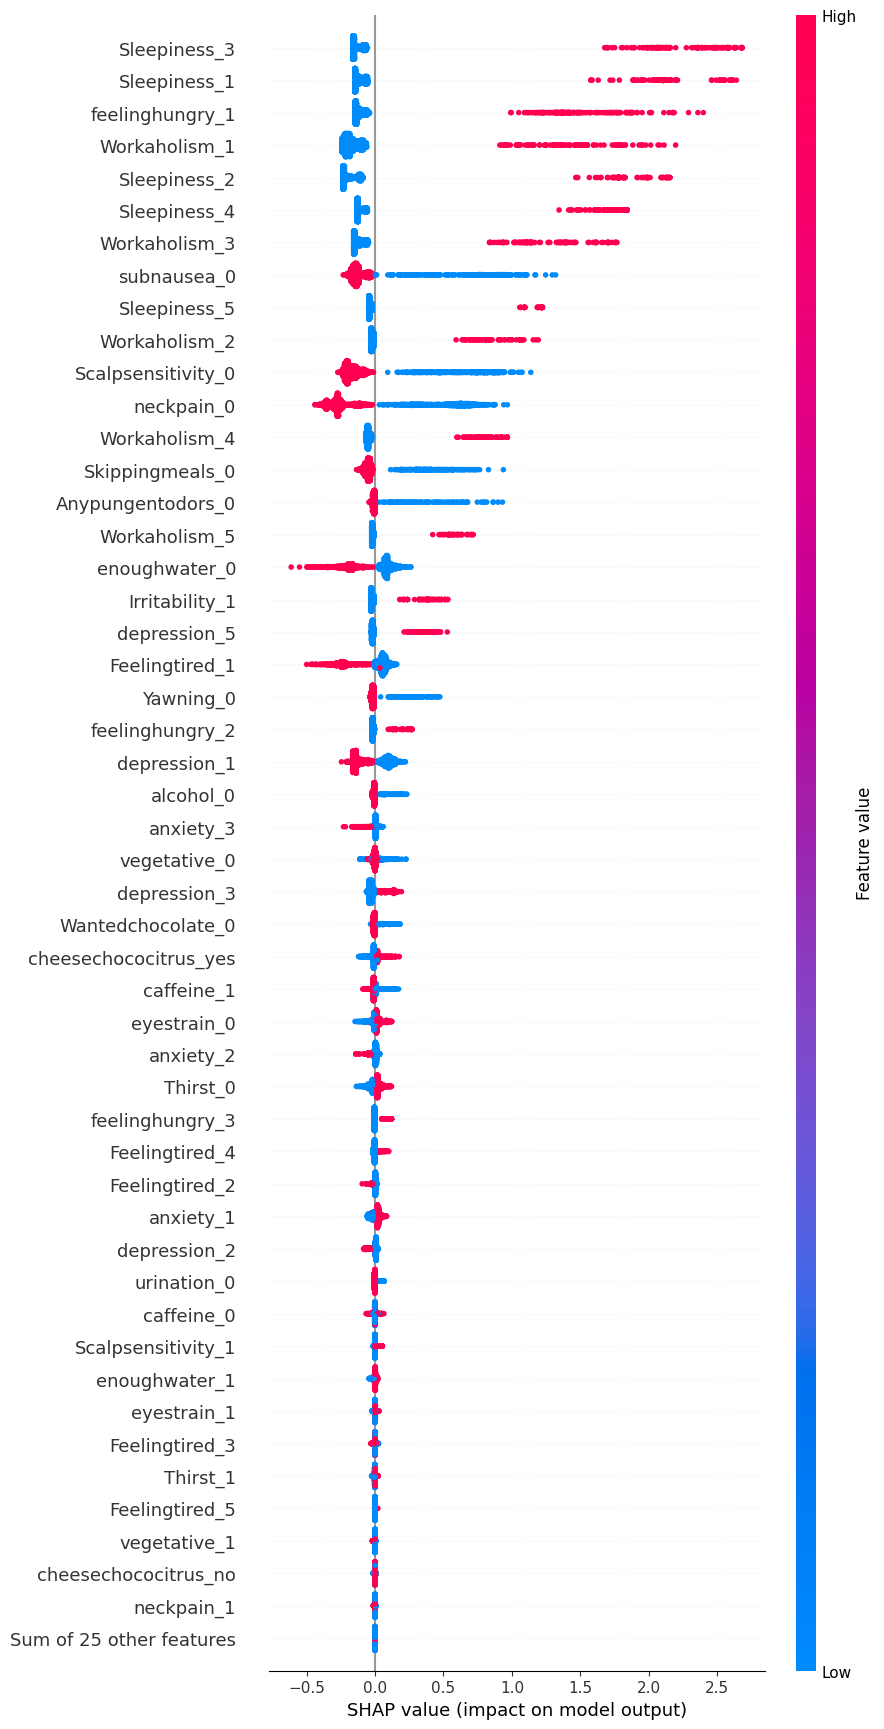

In [86]:
shap.plots.beeswarm(shap_values,  order=shap_values.abs.max(0), max_display=50)

In [87]:
print(classification_report(y_test_ml, model_lgbm.predict(X_test_ml)))

              precision    recall  f1-score   support

           0       0.79      0.96      0.87       874
           1       0.95      0.74      0.83       849

    accuracy                           0.85      1723
   macro avg       0.87      0.85      0.85      1723
weighted avg       0.87      0.85      0.85      1723



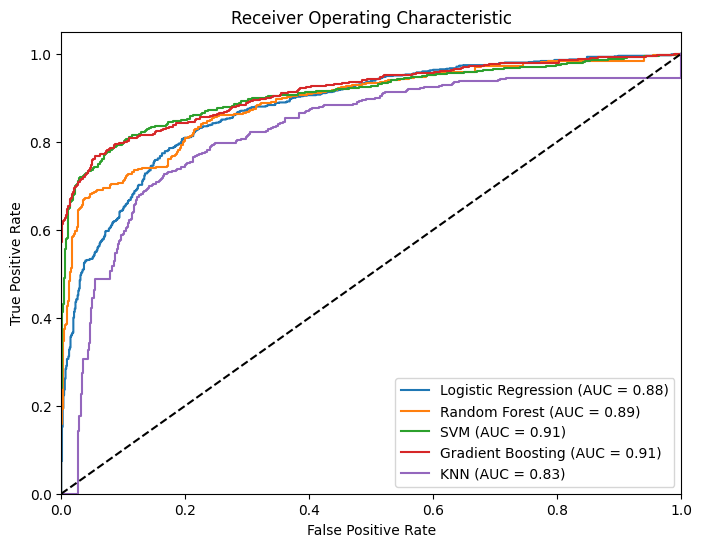

In [88]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', drawstyle='steps-post')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', drawstyle='steps-post')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', drawstyle='steps-post')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', drawstyle='steps-post')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})', drawstyle='steps-post')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [89]:
from sklearn.metrics import classification_report

# Make predictions for each model
pred_lr = model_lr.predict(X_test_ml)
pred_rf = model_rf.predict(X_test_ml)
pred_svm = model_svm.predict(X_test_ml)
pred_gb = model_gb.predict(X_test_ml)
pred_knn = model_knn.predict(X_test_ml)
pred_lgbm = model_lgbm.predict(X_test_ml)

# Generate classification reports
report_lr = classification_report(y_test_ml, pred_lr)
report_rf = classification_report(y_test_ml, pred_rf)
report_svm = classification_report(y_test_ml, pred_svm)
report_gb = classification_report(y_test_ml, pred_gb)
report_knn = classification_report(y_test_ml, pred_knn)
report_lgbm = classification_report(y_test_ml, pred_lgbm)

# Print classification reports
print("Logistic Regression:")
print(report_lr)
print("\nRandom Forest:")
print(report_rf)
print("\nSVM:")
print(report_svm)
print("\nGradient Boosting:")
print(report_gb)
print("\nK-Nearest Neighbors:")
print(report_knn)
print("\nLightGBM:")
print(report_lgbm)

Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       874
           1       0.83      0.74      0.78       849

    accuracy                           0.80      1723
   macro avg       0.80      0.80      0.80      1723
weighted avg       0.80      0.80      0.80      1723


Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       874
           1       0.81      0.75      0.78       849

    accuracy                           0.79      1723
   macro avg       0.79      0.79      0.79      1723
weighted avg       0.79      0.79      0.79      1723


SVM:
              precision    recall  f1-score   support

           0       0.80      0.94      0.86       874
           1       0.92      0.75      0.83       849

    accuracy                           0.85      1723
   macro avg       0.86      0.85      0.85      1723
weighted avg       0.86      0.

In [90]:
from sklearn.metrics import confusion_matrix

# Make predictions for each model
pred_lr = model_lr.predict(X_test_ml)
pred_rf = model_rf.predict(X_test_ml)
pred_svm = model_svm.predict(X_test_ml)
pred_gb = model_gb.predict(X_test_ml)
pred_knn = model_knn.predict(X_test_ml)
# pred_lgbm = model_lgbm.predict(X_test_ml)

# Define a function to calculate sensitivity and specificity
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Calculate metrics for each model
sensitivity_lr, specificity_lr = calculate_metrics(y_test_ml, pred_lr)
sensitivity_rf, specificity_rf = calculate_metrics(y_test_ml, pred_rf)
sensitivity_svm, specificity_svm = calculate_metrics(y_test_ml, pred_svm)
sensitivity_gb, specificity_gb = calculate_metrics(y_test_ml, pred_gb)
sensitivity_knn, specificity_knn = calculate_metrics(y_test_ml, pred_knn)
# sensitivity_lgbm, specificity_lgbm = calculate_metrics(y_test_ml, pred_lgbm)

# Print the results
print("Logistic Regression:")
print("Sensitivity:", sensitivity_lr)
print("Specificity:", specificity_lr)
print("\nRandom Forest:")
print("Sensitivity:", sensitivity_rf)
print("Specificity:", specificity_rf)
print("\nSVM:")
print("Sensitivity:", sensitivity_svm)
print("Specificity:", specificity_svm)
print("\nGradient Boosting:")
print("Sensitivity:", sensitivity_gb)
print("Specificity:", specificity_gb)
print("\nK-Nearest Neighbors:")
print("Sensitivity:", sensitivity_knn)
# print("Specificity:", specificity_knn)
# print("\nLightGBM:")
# print("Sensitivity:", sensitivity_lgbm)
# print("Specificity:", specificity_lgbm)


Logistic Regression:
Sensitivity: 0.7396937573616019
Specificity: 0.8558352402745996

Random Forest:
Sensitivity: 0.7467608951707891
Specificity: 0.8283752860411899

SVM:
Sensitivity: 0.7538280329799765
Specificity: 0.937070938215103

Gradient Boosting:
Sensitivity: 0.7656065959952886
Specificity: 0.9450800915331807

K-Nearest Neighbors:
Sensitivity: 0.4876325088339223


# Boosting test

In [ ]:
models = [
    ("Gradient Boosting", GradientBoostingClassifier(),
     {'n_estimators': [100, 500],
      'max_depth': [3, 4, 5],
      'min_samples_split': [2, 5, 10],
      'learning_rate': [0.01, 0.1]
     }),

    ("XGBoost", xgb.XGBClassifier(),
     {'learning_rate': [0.1, 0.01],
      'max_depth': [3, 5, 7],
      'min_child_weight': [1, 5, 9],
      'n_estimators': [10, 50, 100]
     }),

    ("LightGBM", lgb.LGBMClassifier(),
     {'n_estimators': [100, 500, 1000],
      'learning_rate': [0.01, 0.1],
      'max_depth': [-1, 5, 10],
      'num_leaves': [31, 50, 100]
     })

    # ("CatBoost", CatBoostClassifier(verbose=0),
    #  {'iterations': [100, 500],
    #   'learning_rate': [0.01, 0.1],
    #   'depth': [4, 6, 8],
    #   'min_data_in_leaf': [1, 7, 15]
    #  })
]

# Split data into Stratified K folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform Stratified K-fold cross-validation with GridSearchCV
for model_name, model, param_grid in models:
    print(f"Training {model_name} with GridSearchCV...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                               scoring='roc_auc', cv=skf, verbose=1, n_jobs=-1)
    grid_search.fit(X_train_ml, y_train_ml)

    best_model = grid_search.best_estimator_
    best_auc = grid_search.best_score_
    print(f"Best AUC: {best_auc:.4f}")
    print(f"Best Parameters: {grid_search.best_params_}")

    # Evaluate the best model on the test set
    probs = best_model.predict_proba(X_test_ml)[:, 1]
    auc = roc_auc_score(y_test_ml, probs)
    print(f"{model_name} Test AUC: {auc:.4f}")
    print("")

print("GridSearchCV for all models completed.")

Training Gradient Boosting with GridSearchCV...
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best AUC: 0.7343
Best Parameters: {'learning_rate': 0.1, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Test AUC: 0.7640

Training XGBoost with GridSearchCV...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best AUC: 0.7344
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 100}
XGBoost Test AUC: 0.7656

Training LightGBM with GridSearchCV...
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[LightGBM] [Info] Number of positive: 3450, number of negative: 27066
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007612 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 188
[LightGBM] [Info] Number of data points in the train set: 30

In [ ]:
# Create a list to store AUC scores
auc_scores = []

# Define models with parameters
models = [
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=100,
          max_depth=4,
          min_samples_split=10,
          learning_rate=0.1
          )),
    ("XGBoost", xgb.XGBClassifier(learning_rate = 0.1, max_depth = 3, alpha = 10, min_child_weight=5, n_estimators = 100)),
    ("LightGBM", lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1, verbosity=-1))
    # ("CatBoost", CatBoostClassifier(iterations=5000,
    #                  learning_rate=0.001,
    #                  depth=8,
    #                  min_data_in_leaf=1,
    #                  verbose=0))
]

# Split data into Stratified K folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform Stratified K-fold cross-validation
for model_name, model in models:
    print(f"Training {model_name}...")
    fold_aucs = []

    for train_idx, test_idx in skf.split(X_train_ml, y_train_ml):
        X_train_fold, X_test_fold = X_train_ml[train_idx], X_train_ml[test_idx]
        y_train_fold, y_test_fold = y_train_ml[train_idx], y_train_ml[test_idx]

        model.fit(X_train_fold, y_train_fold)
        if hasattr(model, "predict_proba"):
            probs = model.predict_proba(X_test_fold)[:, 1]
        else:
            probs = model.decision_function(X_test_fold)
        roc_auc = roc_auc_score(y_test_fold, probs)
        fold_aucs.append(roc_auc)

    avg_auc = np.mean(fold_aucs)
    auc_scores.append(avg_auc)
    print(f"{model_name} AUC: {avg_auc:.4f}")

# Print final AUC scores for all models
for model_name, auc in zip([model_name for model_name, _ in models], auc_scores):
    print(f"{model_name} Average AUC: {auc:.4f}")


Training Gradient Boosting...
Gradient Boosting AUC: 0.7337
Training XGBoost...
XGBoost AUC: 0.7324
Training LightGBM...
LightGBM AUC: 0.7339
Gradient Boosting Average AUC: 0.7337
XGBoost Average AUC: 0.7324
LightGBM Average AUC: 0.7339


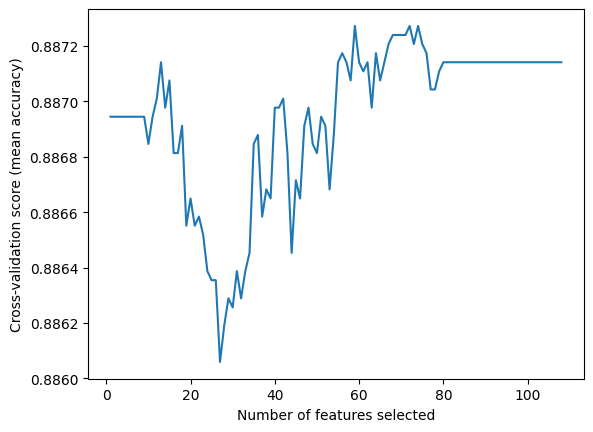

In [ ]:
# Define XGBoost model
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1, verbosity=-1)

# Split data into Stratified K folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform RFECV
rfecv = RFECV(estimator=lgb_model, step=1, cv=skf, scoring='accuracy', n_jobs=-1)
rfecv.fit(X_train_ml, y_train_ml)

# Plot number of features vs. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (mean accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

# Best boosting - LightGBM

In [ ]:
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1)

In [ ]:
# Define the number of folds for cross-validation
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Create lists to store train and validation AUC scores
train_auc_list = []
val_auc_list = []

for train_idx, val_idx in skf.split(X_train_ml, y_train_ml):
    X_train_fold, X_val_fold = X_train_ml[train_idx], X_train_ml[val_idx]
    y_train_fold, y_val_fold = y_train_ml[train_idx], y_train_ml[val_idx]

    # Define the LGBMClassifier with your preferred parameters
    model_lgbm = lgb.LGBMClassifier(
        n_estimators=500,
        learning_rate=0.009,
        max_depth=5,
        num_leaves=110,
        min_child_weight=7,
        objective='binary',
        boosting_type='gbdt',
        verbose=-1
    )

    model_lgbm.fit(X_train_fold, y_train_fold)
    train_probs = model_lgbm.predict_proba(X_train_fold)[:, 1]
    val_probs = model_lgbm.predict_proba(X_val_fold)[:, 1]
    train_auc = roc_auc_score(y_train_fold, train_probs)
    val_auc = roc_auc_score(y_val_fold, val_probs)
    train_auc_list.append(train_auc)
    val_auc_list.append(val_auc)

    print(f"Train AUC: {train_auc:.4f}, Validation AUC: {val_auc:.4f}")

# Calculate and print the mean AUC scores across folds
mean_train_auc = np.mean(train_auc_list)
mean_val_auc = np.mean(val_auc_list)
print(f"Mean Train AUC: {mean_train_auc:.4f}, Mean Validation AUC: {mean_val_auc:.4f}")

Train AUC: 0.7704, Validation AUC: 0.7272
Train AUC: 0.7680, Validation AUC: 0.7306
Train AUC: 0.7654, Validation AUC: 0.7428
Train AUC: 0.7703, Validation AUC: 0.7215
Train AUC: 0.7650, Validation AUC: 0.7473
Mean Train AUC: 0.7678, Mean Validation AUC: 0.7339


In [ ]:
# Define the parameter ranges for grid search
param_grid = {
    'n_estimators': range(10, 5000, 100),
    'learning_rate': np.arange(0.008, 0.02, 0.0005),
    'max_depth': range(2, 6),
    'num_leaves': range(10, 501, 50)
}

# Initialize lists to store results
best_params = None
best_mean_val_auc = 0
results = []

# Perform grid search
for params in ParameterGrid(param_grid):
    train_auc_list = []
    val_auc_list = []

    for train_idx, val_idx in skf.split(X_train_ml, y_train_ml):
        X_train_fold, X_val_fold = X_train_ml[train_idx], X_train_ml[val_idx]
        y_train_fold, y_val_fold = y_train_ml[train_idx], y_train_ml[val_idx]

        model_lgbm = lgb.LGBMClassifier(**params, verbose=-1)
        model_lgbm.fit(X_train_fold, y_train_fold)
        train_probs = model_lgbm.predict_proba(X_train_fold)[:, 1]
        val_probs = model_lgbm.predict_proba(X_val_fold)[:, 1]
        train_auc = roc_auc_score(y_train_fold, train_probs)
        val_auc = roc_auc_score(y_val_fold, val_probs)
        train_auc_list.append(train_auc)
        val_auc_list.append(val_auc)

    mean_val_auc = np.mean(val_auc_list)
    results.append({'params': params, 'mean_val_auc': mean_val_auc})

    if mean_val_auc > best_mean_val_auc:
        best_mean_val_auc = mean_val_auc
        best_params = params

print("Grid search results:")
for result in results:
    print(f"Parameters: {result['params']}, Mean Validation AUC: {result['mean_val_auc']:.4f}")

print("\nBest parameters:")
print(best_params)


In [ ]:
lgb_model = lgb.LGBMClassifier(n_estimators=500, learning_rate=0.01, max_depth=5, num_leaves=50,
                     random_state=0, min_child_weight=7, n_jobs=-1, verbosity=-1)

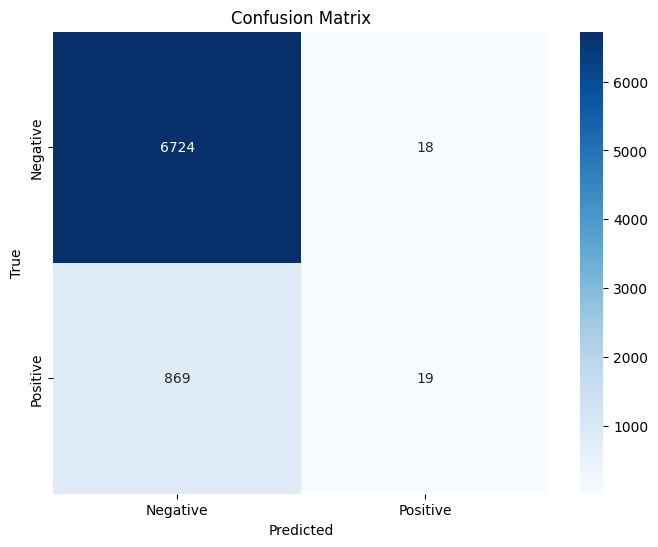

In [ ]:
lgb_model.fit(X_train_ml, y_train_ml)

# Make predictions on your test data
y_pred = lgb_model.predict(X_test_ml)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_ml, y_pred)

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

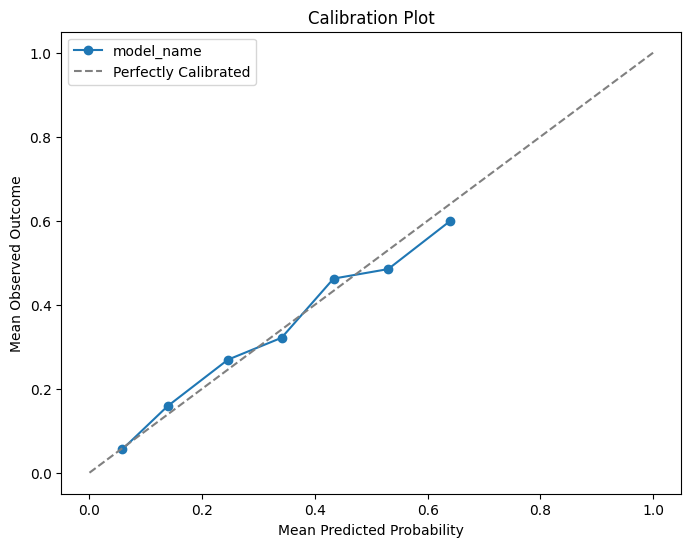

In [ ]:
lgb_model.fit(X_train_ml, y_train_ml)

probabilities = lgb_model.predict_proba(X_test_ml)[:, 1]

# Calculate calibration curve
prob_true, prob_pred = calibration_curve(y_test_ml, probabilities, n_bins=10)

# Create the calibration plot
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', label="model_name")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Mean Observed Outcome')
plt.title('Calibration Plot')
plt.legend()
plt.show()

# DL code

In [ ]:
data.columns = translated_columns
data.dropna(subset=["HA new"], inplace=True)
data = data.drop(data.iloc[:, 27:58],axis = 1)
columns_to_drop = ["comment", "what trigger"]
data = data.drop(columns=columns_to_drop)
data.dropna(inplace=True)
data["HA new"] = data["HA new"].replace({'да': 1, 'нет': 0})
data = data.drop(columns=["startAnswering", "Expecting a migraine"], axis=1)
categorical_columns = [
                            "cheese, choco, citrus"]
binary_columns = ['Thirst', 'caffeine', 'Yawning', 'alcohol'
                        , "neck pain", "vegetative", "subnausea",
                        "urination", "eye strain", "enough water?", "Any pungent odors?",
                          "Skipping meals", "Scalp sensitivity",
                        "Wanted chocolate"]
quantitative_columns = ["anxiety", "depression", "Sleepiness", "feeling hungry",
                              "Workaholism", "Feeling tired", "Irritability"

                              ]
time_data =['time']
date_data = ["date"]
time_data =['time']
date_data = ["date"]
longest_string_index = data[['time']].apply(lambda x: ''.join(x.astype(str)), axis=1).str.len().idxmax()
longest_string = data.loc[longest_string_index, ['time']]
data["HA new"] = data["HA new"].astype(int)
target = data["HA new"]
y = data["HA new"].values
data = data.drop(columns = ["HA new"], axis=1)

for column in binary_columns:
    data[column] = data[column].replace({'да': 1, 'нет': 0})

for column in time_data:
    data[column] = pd.to_datetime(data[column], format='%H:%M')

for column in time_data:
    time_components = [f'{column}_hour', f'{column}_minute']

data[time_components] = data[column].apply(lambda x: pd.Series([x.hour, x.minute]))
data_encoded = pd.get_dummies(data, columns=time_components)


data = pd.get_dummies(data, columns=categorical_columns+quantitative_columns+binary_columns)
data.columns = data.columns.str.replace('да', 'yes').str.replace('нет', 'no')
data["time"] = pd.to_datetime(data["time"]).dt.time
data["datetime"] = pd.to_datetime(data["date"] + " " + data["time"].astype(str))
data.drop(["date", "time", "datetime", "time_hour",	"time_minute"], axis=1, inplace=True)

In [ ]:
# data.columns = translated_columns
# data["HA new"] = data["HA new"].replace({'да': 1, 'нет': 0})
# data_not_import = data[["startAnswering", "id", "comment"]]
# data = data.drop(columns=["startAnswering", "id", "comment"], axis=1)
# categorical_columns = [
#                         "cheese, choco, citrus", "Physical activity"]
# binary_columns = ['Thirst', 'caffeine', 'Yawning', 'alcohol'
#                     , "neck pain", "vegetative", "subnausea",
#                     "urination", "eye strain", "enough water?", "Any pungent odors?",
#                       "Skipping meals", "Scalp sensitivity",
#                     "Wanted chocolate"]
# quantitative_columns = ["anxiety", "depression", "Sleepiness", "feeling hungry",
#                           "Workaholism", "Feeling tired", "Irritability"

#                           ]
# time_data =['time']
# date_data = ["date"]
# time_data =['time']
# date_data = ["date"]
# longest_string_index = data[['time', "Pain onset", "sleep duration", "End of pain"]].apply(lambda x: ''.join(x.astype(str)), axis=1).str.len().idxmax()
# longest_string = data.loc[longest_string_index, ['time', "Pain onset", "sleep duration", "End of pain"]]
# data = data.drop(columns=["Pain now"], axis=1)
# data = data.drop(data.iloc[:, 27:54],axis = 1)
# data = data.drop(columns=["Expecting a migraine"], axis=1)
# mode_values = data.mode().iloc[0]

#   # Fill NaN values with mode values in all columns
# data = data.fillna(mode_values)
# data["HA new"] = data["HA new"].astype(int)
# target = data["HA new"]
# y = data["HA new"].values
# data = data.drop(columns = ["HA new"], axis=1)

In [ ]:
# for column in binary_columns:
#     data[column] = data[column].replace({'да': 1, 'нет': 0})

# for column in time_data:
#     data[column] = pd.to_datetime(data[column], format='%H:%M')

# for column in time_data:
#     time_components = [f'{column}_hour', f'{column}_minute']

#     data[time_components] = data[column].apply(lambda x: pd.Series([x.hour, x.minute]))
#     data_encoded = pd.get_dummies(data, columns=time_components)

# data = pd.get_dummies(data, columns=categorical_columns+quantitative_columns+binary_columns)

# data["time"] = pd.to_datetime(data["time"]).dt.time
# data["datetime"] = pd.to_datetime(data["date"] + " " + data["time"].astype(str))
# data.drop(["date", "time", "datetime"], axis=1, inplace=True)
# data = pd.get_dummies(data)

KeyError: ignored

In [ ]:
data.columns = data.columns.str.replace('да', 'yes').str.replace('нет', 'no')


In [ ]:
for column in data.columns:
    print(column)

time_hour
time_minute
cheese, choco, citrus_yes
cheese, choco, citrus_no
Physical activity_Слабо
Physical activity_yes
Physical activity_интенсивная
Physical activity_интенсивно
Physical activity_no
Physical activity_слабо
Physical activity_совсем no
Physical activity_средне
anxiety_1
anxiety_2
anxiety_3
anxiety_4
anxiety_5
anxiety_yes
anxiety_no
depression_1
depression_2
depression_3
depression_4
depression_5
Sleepiness_1
Sleepiness_2
Sleepiness_3
Sleepiness_4
Sleepiness_5
Sleepiness_1
Sleepiness_2
Sleepiness_3
Sleepiness_4
Sleepiness_5
Sleepiness_H
Sleepiness_Хочу просто лежать горизонтально
Sleepiness_yes
Sleepiness_no
feeling hungry_1
feeling hungry_2
feeling hungry_3
feeling hungry_4
feeling hungry_5
feeling hungry_/
feeling hungry_1
feeling hungry_2
feeling hungry_3
feeling hungry_4
feeling hungry_5
feeling hungry_no
Workaholism_1
Workaholism_2
Workaholism_3
Workaholism_4
Workaholism_5
Workaholism_1
Workaholism_2
Workaholism_3
Workaholism_4
Workaholism_5
Workaholism_Ц
Workaholism

In [ ]:
print(data.columns)

Index(['time_hour', 'time_minute', 'cheese, choco, citrus_yes',
       'cheese, choco, citrus_no', 'Physical activity_Слабо',
       'Physical activity_yes', 'Physical activity_интенсивная',
       'Physical activity_интенсивно', 'Physical activity_no',
       'Physical activity_слабо',
       ...
       'what trigger_физическая активность',
       'what trigger_физическая усталость, духота',
       'what trigger_физические нагрузки, недосып', 'what trigger_холод',
       'what trigger_шоколад', 'what trigger_шум',
       'what trigger_шум, люди, разговоры вокруг.',
       'what trigger_шум, простите, но моя злость на весь мир',
       'what trigger_шум, стресс, кофе', 'what trigger_яркое солнце'],
      dtype='object', length=1601)


In [ ]:
len(data.columns)

99

In [ ]:
columns_to_drop = ['time_hour', 'time_minute']
data_without_columns = data.drop(columns=columns_to_drop)

KeyError: ignored

In [ ]:
names_columns = data_without_columns.columns

In [ ]:
len(names_columns)

1599

In [ ]:
X = data.iloc[:, 2:].values
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32).reshape(-1, 1)

In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: torch.Size([32604, 97])
y shape: torch.Size([32604, 1])


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:
def train_one_epoch(model, X_train, y_train, optimizer, loss_fn, device):
    model.train()
    losses = []
    accuracies = []
    predictions = []
    true_labels = []
    batch_size = 10
    for start in range(0, len(X_train) - batch_size + 1, batch_size):
        X_batch = X_train[start:start+batch_size].to(device)
        y_batch = y_train[start:start+batch_size].to(device)

        optimizer.zero_grad()

        y_pred = model(X_batch)
        loss = loss_fn(y_pred, y_batch)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())
        accuracies.append((y_pred.round() == y_batch).float().mean().item())
        predictions.append(y_pred.cpu().detach().numpy())
        true_labels.append(y_batch.cpu().detach().numpy())

    return np.mean(losses), np.mean(accuracies), np.concatenate(predictions), np.concatenate(true_labels)

def evaluate(model, X_val, y_val, loss_fn, device):
    model.eval()
    with torch.no_grad():
        X_val, y_val = X_val.to(device), y_val.to(device)
        y_pred = model(X_val)
        loss = loss_fn(y_pred, y_val)
        acc = (y_pred.round() == y_val).float().mean().item()
    return loss.item(), acc, y_pred.cpu().detach().numpy(), y_val.cpu().detach().numpy()


In [ ]:
class FCModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(97, 180)
        self.batch_norm1 = nn.BatchNorm1d(180)
        self.relu1 = nn.LeakyReLU()
        self.dropout1 = nn.Dropout(0.2)

        init.xavier_uniform_(self.hidden1.weight)
        init.zeros_(self.hidden1.bias)

        self.hidden2 = nn.Linear(180, 90)
        self.batch_norm2 = nn.BatchNorm1d(90)
        self.relu2 = nn.LeakyReLU()
        self.dropout2 = nn.Dropout(0.2)

        init.xavier_uniform_(self.hidden2.weight)
        init.zeros_(self.hidden2.bias)

        self.output = nn.Linear(90, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu1(self.batch_norm1(self.hidden1(x)))
        x = self.dropout1(x)
        x = self.relu2(self.batch_norm2(self.hidden2(x)))
        x = self.dropout2(x)
        x = self.sigmoid(self.output(x))
        return x


Epoch 1: Train Loss: 0.4047, Train Acc: 0.8647, Val Loss: 0.3764, Val Acc: 0.8683, Train AUC: 0.5784, Val AUC: 0.6745
Epoch 2: Train Loss: 0.3655, Train Acc: 0.8685, Val Loss: 0.3610, Val Acc: 0.8685, Train AUC: 0.6823, Val AUC: 0.7137
Epoch 3: Train Loss: 0.3577, Train Acc: 0.8686, Val Loss: 0.3560, Val Acc: 0.8697, Train AUC: 0.7059, Val AUC: 0.7257
Epoch 4: Train Loss: 0.3508, Train Acc: 0.8690, Val Loss: 0.3527, Val Acc: 0.8695, Train AUC: 0.7240, Val AUC: 0.7308
Epoch 5: Train Loss: 0.3506, Train Acc: 0.8686, Val Loss: 0.3497, Val Acc: 0.8698, Train AUC: 0.7243, Val AUC: 0.7354
Epoch 6: Train Loss: 0.3449, Train Acc: 0.8683, Val Loss: 0.3496, Val Acc: 0.8697, Train AUC: 0.7398, Val AUC: 0.7377
Epoch 7: Train Loss: 0.3453, Train Acc: 0.8686, Val Loss: 0.3487, Val Acc: 0.8683, Train AUC: 0.7372, Val AUC: 0.7396
Epoch 8: Train Loss: 0.3444, Train Acc: 0.8694, Val Loss: 0.3473, Val Acc: 0.8685, Train AUC: 0.7391, Val AUC: 0.7398
Epoch 9: Train Loss: 0.3426, Train Acc: 0.8695, Val Loss

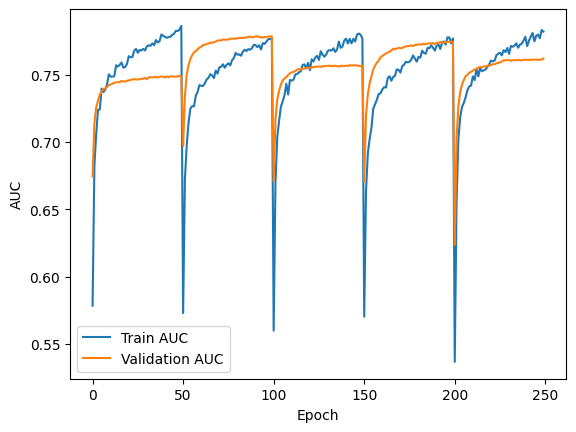

In [ ]:
cv_scores_wide = []
cv_scores_deep = []
train_auc_list = []
val_auc_list = []

def init_cyclical_lr(optimizer, base_lr, max_lr, step_size_up, step_size_down):
    return CyclicLR(optimizer, base_lr=base_lr, max_lr=max_lr, step_size_up=step_size_up, step_size_down=step_size_down)

for train, test in kfold.split(X_train, y_train):
    model = FCModel().to(device)
    optimizer = SGD(model.parameters(), lr=0.01, momentum=0.99)
    scheduler = init_cyclical_lr(optimizer, base_lr=1e-4, max_lr=5e-4, step_size_up=2000, step_size_down=4000)
    loss_fn = nn.BCELoss()
    best_acc = 0
    best_weights = None

    for epoch in range(50):
        train_loss, train_acc, train_prob, train_true = train_one_epoch(model, X_train[train], y_train[train], optimizer, loss_fn, device)
        val_loss, val_acc, val_prob, val_true = evaluate(model, X_train[test], y_train[test], loss_fn, device)

        train_auc = roc_auc_score(train_true, train_prob)
        val_auc = roc_auc_score(val_true, val_prob)

        train_auc_list.append(train_auc)
        val_auc_list.append(val_auc)

        if val_acc > best_acc:
            best_acc = val_acc
            best_weights = copy.deepcopy(model.state_dict())

        print(f'Epoch {epoch+1}: Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}, Train AUC: {train_auc:.4f}, Val AUC: {val_auc:.4f}')

        # Step the cyclical learning rate scheduler
        scheduler.step()

    model.load_state_dict(best_weights)
    cv_scores_deep.append(best_acc)
    torch.save(best_weights, f'best_model_fold_{test}.pth')

plt.plot(train_auc_list, label="Train AUC")
plt.plot(val_auc_list, label="Validation AUC")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.8 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = FCModel().to(device)
model.eval()

FCModel(
  (hidden1): Linear(in_features=1599, out_features=180, bias=True)
  (batch_norm1): BatchNorm1d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (dropout1): Dropout(p=0.2, inplace=False)
  (hidden2): Linear(in_features=180, out_features=90, bias=True)
  (batch_norm2): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (dropout2): Dropout(p=0.2, inplace=False)
  (output): Linear(in_features=90, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
def predict(input_data):
    input_data = torch.tensor(input_data, dtype=torch.float32).to(device)
    with torch.no_grad():
        output = model(input_data)
    return output.cpu().numpy()

explainer = shap.Explainer(predict, X_train)

NameError: ignored

In [ ]:
X_train

# Compare FCModel to other

In [ ]:
best_model = FCModel().to(device)
best_model.eval()

FCModel(
  (hidden1): Linear(in_features=1599, out_features=180, bias=True)
  (batch_norm1): BatchNorm1d(180, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): LeakyReLU(negative_slope=0.01)
  (dropout1): Dropout(p=0.2, inplace=False)
  (hidden2): Linear(in_features=180, out_features=90, bias=True)
  (batch_norm2): BatchNorm1d(90, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): LeakyReLU(negative_slope=0.01)
  (dropout2): Dropout(p=0.2, inplace=False)
  (output): Linear(in_features=90, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

In [ ]:
probs_deep = []
auc_scores = []
batch_size = 10

with torch.no_grad():
    for start in range(0, len(X_test), batch_size):
        end = start + batch_size
        X_batch = X_test[start:end].to(device)
        probs_batch = model(X_batch).detach().cpu().numpy()[:, 0]
        probs_deep.extend(probs_batch)

probs_deep = np.array(probs_deep)
roc_auc_deep = roc_auc_score(y_test, probs_deep)
fpr_deep, tpr_deep, _ = roc_curve(y_test, probs_deep)
auc_scores.append(roc_auc_deep)

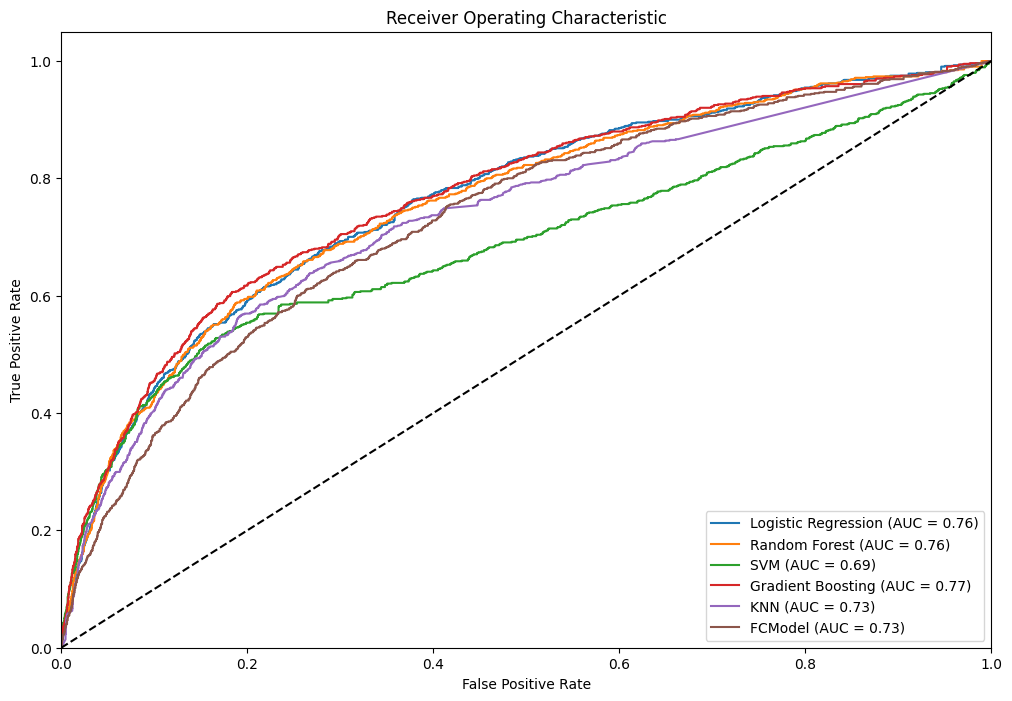

In [ ]:
plt.figure(figsize=(12, 8))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})', drawstyle='steps-post')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', drawstyle='steps-post')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})', drawstyle='steps-post')
plt.plot(fpr_gb, tpr_gb, label=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})', drawstyle='steps-post')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_deep, tpr_deep, label=f'FCModel (AUC = {roc_auc_deep:.2f})', drawstyle='steps-post')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Visualization

In [91]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=fpr_lr, y=tpr_lr, mode='lines', name=f'Logistic Regression (AUC = {roc_auc_lr:.2f})'))
fig.add_trace(go.Scatter(x=fpr_rf, y=tpr_rf, mode='lines', name=f'Random Forest (AUC = {roc_auc_rf:.2f})'))
fig.add_trace(go.Scatter(x=fpr_svm, y=tpr_svm, mode='lines', name=f'SVM (AUC = {roc_auc_svm:.2f})'))
fig.add_trace(go.Scatter(x=fpr_gb, y=tpr_gb, mode='lines', name=f'Gradient Boosting (AUC = {roc_auc_gb:.2f})'))
fig.add_trace(go.Scatter(x=fpr_knn, y=tpr_knn, mode='lines', name=f'KNN (AUC = {roc_auc_knn:.2f})'))
fig.add_trace(go.Scatter(x=fpr_lgbm, y=tpr_lgbm, mode='lines', name=f'LightGBM (AUC = {roc_auc_lgbm:.2f})'))
# fig.add_trace(go.Scatter(x=fpr_deep, y=tpr_deep, mode='lines', name=f'FCModel (AUC = {roc_auc_deep:.2f})'))

fig.add_trace(go.Scatter(x=[0, 1], y=[0, 1], mode='lines', name='Random Classifier', line=dict(dash='dash')))

fig.update_layout(
    xaxis_title='False Positive Rate',
    yaxis_title='True Positive Rate',
    title='Receiver Operating Characteristic',
    xaxis=dict(scaleanchor='x', scaleratio=1),
    yaxis=dict(scaleanchor='y', scaleratio=1),
    autosize=False,
    width=800,
    height=600
)

fig.show()


In [94]:
ap_scores = []

ap_lr = average_precision_score(y_test_ml, probs_lr)
precision_lr, recall_lr, _ = precision_recall_curve(y_test_ml, probs_lr)
ap_scores.append(ap_lr)


ap_rf = average_precision_score(y_test_ml, probs_rf)
precision_rf, recall_rf, _ = precision_recall_curve(y_test_ml, probs_rf)
ap_scores.append(ap_rf)

ap_svm = average_precision_score(y_test_ml, probs_svm)
precision_svm, recall_svm, _ = precision_recall_curve(y_test_ml, probs_svm)
ap_scores.append(ap_svm)

ap_gb = average_precision_score(y_test_ml, probs_gb)
precision_gb, recall_gb, _ = precision_recall_curve(y_test_ml, probs_gb)
ap_scores.append(ap_gb)

ap_knn = average_precision_score(y_test_ml, probs_knn)
precision_knn, recall_knn, _ = precision_recall_curve(y_test_ml, probs_knn)
ap_scores.append(ap_knn)

probs_lgbm = np.array(probs_lgbm)
ap_lgbm = average_precision_score(y_test_ml, probs_lgbm)
precision_lgbm, recall_lgbm, _ = precision_recall_curve(y_test_ml, probs_lgbm)
ap_scores.append(ap_lgbm)

# probs_deep = np.array(probs_deep)
# ap_deep = average_precision_score(y_test, probs_deep)
# precision_deep, recall_deep, _ = precision_recall_curve(y_test, probs_deep)
# ap_scores.append(ap_deep)

In [95]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=recall_lr, y=precision_lr, mode='lines', name=f'Logistic Regression (AP = {ap_lr:.2f})'))
fig.add_trace(go.Scatter(x=recall_rf, y=precision_rf, mode='lines', name=f'Random Forest (AP = {ap_rf:.2f})'))
fig.add_trace(go.Scatter(x=recall_svm, y=precision_svm, mode='lines', name=f'SVM (AP = {ap_svm:.2f})'))
fig.add_trace(go.Scatter(x=recall_gb, y=precision_gb, mode='lines', name=f'Gradient Boosting (AP = {ap_gb:.2f})'))
fig.add_trace(go.Scatter(x=recall_knn, y=precision_knn, mode='lines', name=f'KNN (AP = {ap_knn:.2f})'))
fig.add_trace(go.Scatter(x=recall_lgbm, y=precision_lgbm, mode='lines', name=f'LightGBM (AP = {ap_lgbm:.2f})'))
# fig.add_trace(go.Scatter(x=recall_deep, y=precision_deep, mode='lines', name=f'FCModel (AP = {ap_deep:.2f})'))

fig.update_layout(
    title='Precision-Recall Curve',
    xaxis_title='Recall',
    yaxis_title='Precision',
    xaxis=dict(range=[0, 1]),
    yaxis=dict(range=[0, 1.05]),
    autosize=False,
    width=1200,
    height=800,
    legend=dict(x=0.6, y=0.1)
)

fig.show()

In [96]:
thresholds_lr = precision_recall_curve(y_test_ml, probs_lr)[-1]
f1_scores_lr = [f1_score(y_test_ml, probs_lr >= thr) for thr in thresholds_lr]

thresholds_rf = precision_recall_curve(y_test_ml, probs_rf)[-1]
f1_scores_rf = [f1_score(y_test_ml, probs_rf >= thr) for thr in thresholds_rf]

thresholds_svm = precision_recall_curve(y_test_ml, probs_svm)[-1]
f1_scores_svm = [f1_score(y_test_ml, probs_svm >= thr) for thr in thresholds_svm]
thresholds_gb = precision_recall_curve(y_test_ml, probs_gb)[-1]
f1_scores_gb = [f1_score(y_test_ml, probs_gb >= thr) for thr in thresholds_gb]

thresholds_knn = precision_recall_curve(y_test_ml, probs_knn)[-1]
f1_scores_knn = [f1_score(y_test_ml, probs_knn >= thr) for thr in thresholds_knn]

thresholds_lgbm = precision_recall_curve(y_test_ml, probs_lgbm)[-1]
f1_scores_lgbm = [f1_score(y_test_ml, probs_lgbm >= thr) for thr in thresholds_lgbm]

# thresholds_deep = precision_recall_curve(y_test, probs_deep)[-1]
# f1_scores_deep = [f1_score(y_test, probs_deep >= thr) for thr in thresholds_deep]

In [97]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=thresholds_lr, y=f1_scores_lr, mode='lines', name='Logistic Regression'))
fig.add_trace(go.Scatter(x=thresholds_rf, y=f1_scores_rf, mode='lines', name='Random Forest'))
fig.add_trace(go.Scatter(x=thresholds_svm, y=f1_scores_svm, mode='lines', name='SVM'))
fig.add_trace(go.Scatter(x=thresholds_gb, y=f1_scores_gb, mode='lines', name='Gradient Boosting'))
fig.add_trace(go.Scatter(x=thresholds_knn, y=f1_scores_knn, mode='lines', name='KNN'))
fig.add_trace(go.Scatter(x=thresholds_lgbm, y=f1_scores_lgbm, mode='lines', name='LightGBM'))
# fig.add_trace(go.Scatter(x=thresholds_deep, y=f1_scores_deep, mode='lines', name='FCModel'))

fig.update_layout(
    title='F1 Score Curve',
    xaxis=dict(title='Threshold'),
    yaxis=dict(title='F1 Score', range=[0, 1.05]),
    autosize=False,
    width=800,
    height=500
)

fig.show()